In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [3]:
from network_simulation import Kuramoto_neural_network

In [4]:
connectivity_span = np.arange(0.1,5,0.25)
num_ensembles_each_g = 5
sigma_record = np.zeros( shape = (len(connectivity_span),num_ensembles_each_g) )

In [5]:
for i,connectivity in enumerate(tqdm( connectivity_span , desc='Variation of connectivities') ):
    for j in tqdm( range(num_ensembles_each_g) , desc='Making ensembles'):
        sample_model = Kuramoto_neural_network(num_neurons=100,g=connectivity)
        sample_model.ignite(total_time = 1000)
        sample_model.compute_effective_field( alpha = 20)
        sigma_record[i][j] = sample_model.report_sigma()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 21566.37it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 22436.04it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 21045.53it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 20455.02it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 21145.25it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 20979.03it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 20894.42it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 20606.26it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 20967.71it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 21065.25it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 21315.38it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 22037.77it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 21432.31it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 22441.22it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:05<00:00, 17338.10it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:06<00:00, 15435.53it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:06<00:00, 15524.01it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:06<00:00, 15396.36it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:05<00:00, 18828.63it/s]


network dynamic: 100%|██████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 22085.89it/s]


In [6]:
# sigma_record = connectivity_record
np.save('sigma_records.npy',sigma_record)

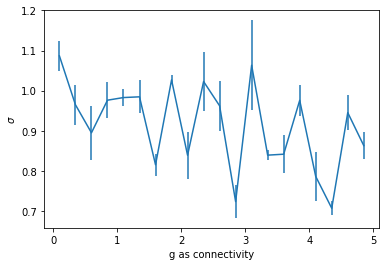

In [7]:
fig = plt.figure()
ax = fig.subplots()
ax.errorbar(x = connectivity_span, y = np.mean(sigma_record,axis = 1),yerr = np.var(sigma_record,axis = 1))
# ax.set_title('$\sigma$')
ax.set_xlabel('g as connectivity')
ax.set_ylabel('$\sigma$')
fig.savefig('sigma_as_synchoronization_meter.png')

In [8]:
np.sum(sigma_record,axis = 0)

array([18.13122391, 17.41306037, 18.57316642, 18.95901625, 18.42130793])

In [9]:
sigma_record.shape

(20, 5)

In [10]:
sigma_record

array([[0.92295573, 1.05660109, 1.44251559, 1.10044305, 0.91007383],
       [0.93007386, 0.81497146, 0.98265285, 1.37420157, 0.72208676],
       [0.55505368, 1.04817039, 0.84286987, 1.3004231 , 0.72799361],
       [0.94691755, 0.98287084, 0.62026628, 1.0601047 , 1.27058306],
       [0.91383059, 0.93474813, 0.77376673, 1.19996343, 1.09133585],
       [0.91720852, 0.77644666, 1.27855851, 1.16338215, 0.78710153],
       [0.50602787, 0.81303692, 0.88576828, 0.87397671, 0.99713473],
       [0.93830722, 1.05374471, 1.1108057 , 1.1590899 , 0.87184953],
       [0.96216838, 1.0887242 , 1.03630675, 0.63730257, 0.47046874],
       [0.65777426, 0.90655337, 0.8872183 , 1.23841145, 1.42350922],
       [0.829566  , 0.59865708, 1.33775669, 0.94629985, 1.09848204],
       [0.63330232, 0.48306513, 0.98956926, 0.57582881, 0.93512146],
       [1.50791271, 1.0767018 , 1.3463407 , 0.62902795, 0.75640977],
       [1.04505413, 0.85586784, 0.76660805, 0.7676996 , 0.76066243],
       [1.14819685, 0.70442817, 0.

In [11]:
sigma_record[0]

array([0.92295573, 1.05660109, 1.44251559, 1.10044305, 0.91007383])